In [68]:
# Import de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from time import time
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [69]:
# Carregamento de Dados
test = pd.read_csv(r'Datasets\test_data.csv', encoding='latin-1')
train = pd.read_csv(r'Datasets\training_data.csv', encoding='latin-1')

In [70]:
# Vizualização dos dados

In [71]:
test.head()

,city_name,record_date,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-02-13 23:00:00,39.2,0.0,91.0,DARK,8.0,1026.0,71.0,1.0,céu claro,0.0,NaN
1,Porto,2018-11-28 20:00:00,42.5,12.2,76.8,DARK,11.0,1020.0,93.0,4.0,nuvens dispersas,0.0,NaN
2,Porto,2018-08-14 05:00:00,45.9,0.0,86.3,DARK,14.0,1017.0,93.0,0.0,NaN,0.0,NaN
3,Porto,2019-07-06 17:00:00,33.2,51.7,89.9,LIGHT,22.0,1016.0,77.0,4.0,céu pouco nublado,0.0,NaN
4,Porto,2018-10-15 06:00:00,44.0,3.5,85.5,DARK,12.0,1004.0,100.0,9.0,NaN,0.0,chuva fraca


In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                1500 non-null   object 
 1   record_date              1500 non-null   object 
 2   AVERAGE_FREE_FLOW_SPEED  1500 non-null   float64
 3   AVERAGE_TIME_DIFF        1500 non-null   float64
 4   AVERAGE_FREE_FLOW_TIME   1500 non-null   float64
 5   LUMINOSITY               1500 non-null   object 
 6   AVERAGE_TEMPERATURE      1500 non-null   float64
 7   AVERAGE_ATMOSP_PRESSURE  1500 non-null   float64
 8   AVERAGE_HUMIDITY         1500 non-null   float64
 9   AVERAGE_WIND_SPEED       1500 non-null   float64
 10  AVERAGE_CLOUDINESS       901 non-null    object 
 11  AVERAGE_PRECIPITATION    1500 non-null   float64
 12  AVERAGE_RAIN             140 non-null    object 
dtypes: float64(8), object(5)
memory usage: 152.5+ KB


In [73]:
test.duplicated().sum()

np.int64(0)

In [74]:
# Valores Nulos
test.isnull().sum()

city_name                     0
record_date                   0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS          599
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               1360
dtype: int64

<Axes: >

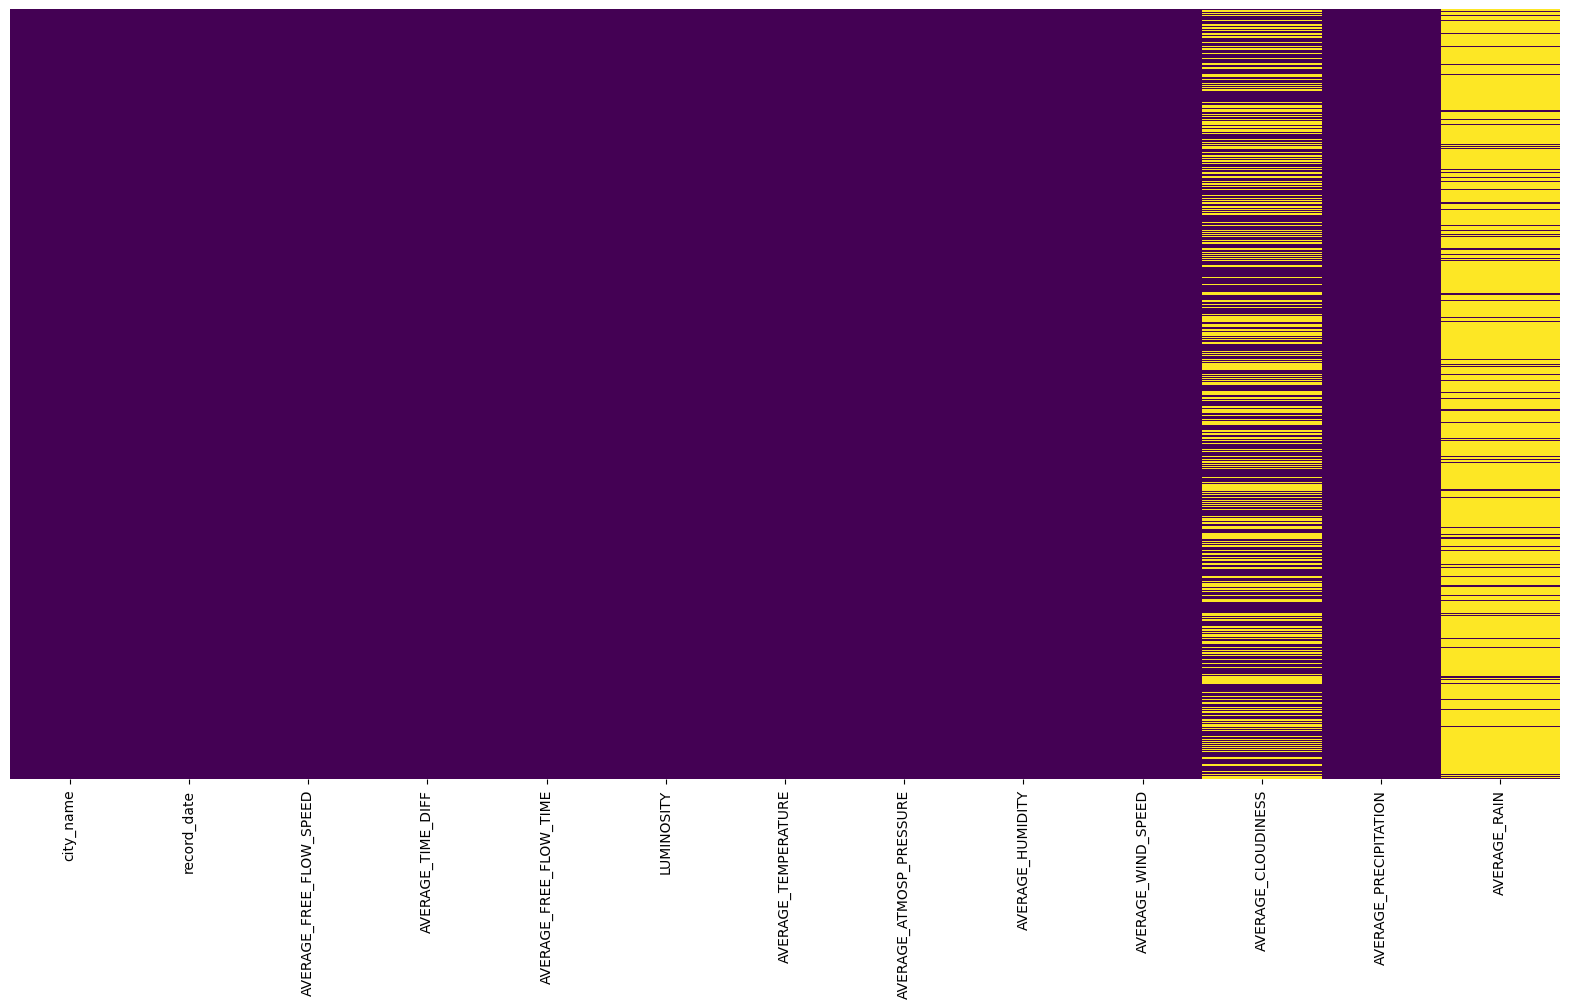

In [75]:
# # Visualização de Valores Nulos
plt.figure(figsize=(20,10))
sns.heatmap(test.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [76]:
# Valores Únicos
test.nunique()

city_name                     1
record_date                1500
AVERAGE_FREE_FLOW_SPEED     199
AVERAGE_TIME_DIFF           610
AVERAGE_FREE_FLOW_TIME      337
LUMINOSITY                    3
AVERAGE_TEMPERATURE          32
AVERAGE_ATMOSP_PRESSURE      42
AVERAGE_HUMIDITY             70
AVERAGE_WIND_SPEED           14
AVERAGE_CLOUDINESS            9
AVERAGE_PRECIPITATION         1
AVERAGE_RAIN                  9
dtype: int64

In [77]:
train.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       4612 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [79]:
train.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


In [80]:
train.duplicated().sum()

np.int64(0)

In [81]:
# Valores Nulos
train.isnull().sum()

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF         2200
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64

<Axes: >

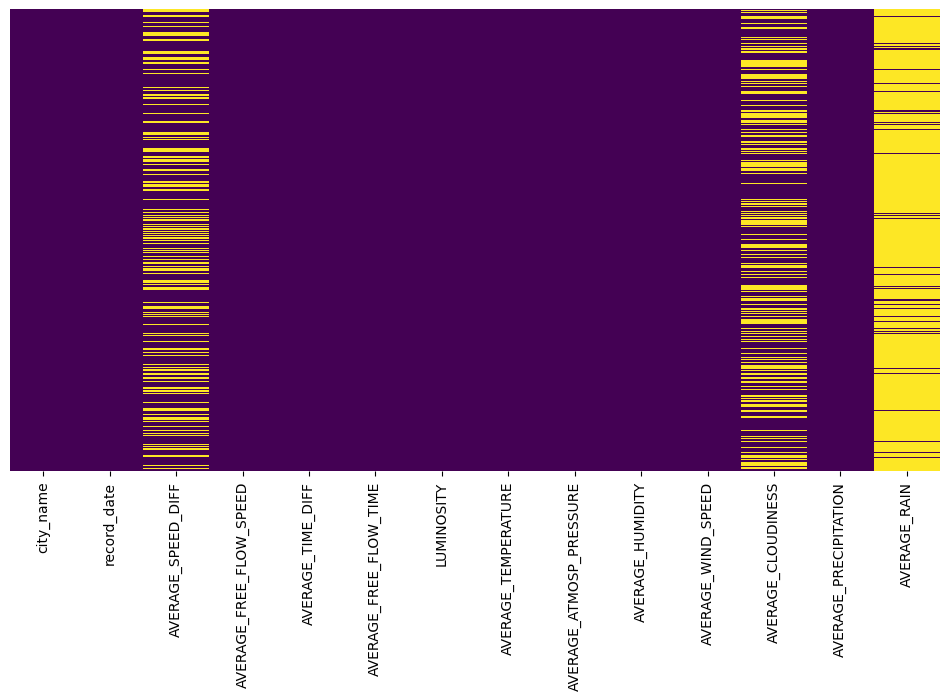

In [82]:
# Visusalização de Valores Nulos
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [83]:
# Valores Únicos
train.nunique()

city_name                     1
record_date                6812
AVERAGE_SPEED_DIFF            4
AVERAGE_FREE_FLOW_SPEED     225
AVERAGE_TIME_DIFF          1151
AVERAGE_FREE_FLOW_TIME      442
LUMINOSITY                    3
AVERAGE_TEMPERATURE          38
AVERAGE_ATMOSP_PRESSURE      43
AVERAGE_HUMIDITY             77
AVERAGE_WIND_SPEED           15
AVERAGE_CLOUDINESS            9
AVERAGE_PRECIPITATION         1
AVERAGE_RAIN                 13
dtype: int64

In [84]:
# Definição de variáveis preditoras e alvo
X_train = train.drop(columns=['AVERAGE_SPEED_DIFF'])
y_train = train['AVERAGE_SPEED_DIFF']
X_test = test

In [85]:
# Feature Engineering

# city_name é sempre porto, o que torna a coluna irrelevante
X_train = X_train.drop(columns=['city_name'])
X_test = X_test.drop(columns=['city_name'])

# AVERAGE_PRECIPITATION só tem um unico valor, o que a torna irrelevante
X_train = X_train.drop(columns=['AVERAGE_PRECIPITATION'])
X_test = X_test.drop(columns=['AVERAGE_PRECIPITATION'])

In [86]:
# record_date, uma data/hora (timestamp) como "2018-07-24 00:00:00" não é útil para um modelo. Se transformarmos em feutures numéricas, pode ser melhor para o modelo entender. Podemos extrair dia da semana, mês, hora do dia, etc.
X_train['record_date'] = pd.to_datetime(X_train['record_date'])
X_train['year'] = X_train['record_date'].dt.year
X_train['day_of_week'] = X_train['record_date'].dt.dayofweek
X_train['month'] = X_train['record_date'].dt.month
X_train['week'] = X_train['record_date'].dt.isocalendar().week
X_train['day'] = X_train['record_date'].dt.day
X_train['hour'] = X_train['record_date'].dt.hour
X_train = X_train.drop(columns=['record_date'])
X_test['record_date'] = pd.to_datetime(X_test['record_date'])
X_test['year'] = X_test['record_date'].dt.year
X_test['day_of_week'] = X_test['record_date'].dt.dayofweek
X_test['month'] = X_test['record_date'].dt.month
X_test['week'] = X_test['record_date'].dt.isocalendar().week
X_test['day'] = X_test['record_date'].dt.day
X_test['hour'] = X_test['record_date'].dt.hour
X_test = X_test.drop(columns=['record_date'])

In [87]:
X_train.nunique()

AVERAGE_FREE_FLOW_SPEED     225
AVERAGE_TIME_DIFF          1151
AVERAGE_FREE_FLOW_TIME      442
LUMINOSITY                    3
AVERAGE_TEMPERATURE          38
AVERAGE_ATMOSP_PRESSURE      43
AVERAGE_HUMIDITY             77
AVERAGE_WIND_SPEED           15
AVERAGE_CLOUDINESS            9
AVERAGE_RAIN                 13
year                          2
day_of_week                   7
month                        12
week                         46
day                          31
hour                         24
dtype: int64

In [88]:
# Encoding

# Mapear as categorias de y_train para valores numéricos
y_train = y_train.map({'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High': 4})

#Dropagem de colunas com muitos valores nulos
X_train = X_train.drop(columns=['AVERAGE_RAIN'])
X_test = X_test.drop(columns=['AVERAGE_RAIN'])

In [89]:
X_train.isna().sum()

AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
year                          0
day_of_week                   0
month                         0
week                          0
day                           0
hour                          0
dtype: int64

In [90]:
# Moda para AVERAGE_CLOUDINESS de acordo com o ano, o mês e o dia respetivo

# Criar uma série com a moda para cada combinação de ano, mês e dia
train_mode = X_train.groupby(['year','month', 'day'])['AVERAGE_CLOUDINESS'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
test_mode = X_test.groupby(['year','month', 'day'])['AVERAGE_CLOUDINESS'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)

# Preencher os valores nulos em AVERAGE_CLOUDINESS com a moda correspondente
X_train['AVERAGE_CLOUDINESS'] = X_train.apply(lambda row: train_mode[row['year'], row['month'], row['day']] if pd.isna(row['AVERAGE_CLOUDINESS']) else row['AVERAGE_CLOUDINESS'], axis=1)
X_test['AVERAGE_CLOUDINESS'] = X_test.apply(lambda row: test_mode[row['year'], row['month'], row['day']] if pd.isna(row['AVERAGE_CLOUDINESS']) else row['AVERAGE_CLOUDINESS'], axis=1)

In [91]:
X_train.isna().sum()

AVERAGE_FREE_FLOW_SPEED      0
AVERAGE_TIME_DIFF            0
AVERAGE_FREE_FLOW_TIME       0
LUMINOSITY                   0
AVERAGE_TEMPERATURE          0
AVERAGE_ATMOSP_PRESSURE      0
AVERAGE_HUMIDITY             0
AVERAGE_WIND_SPEED           0
AVERAGE_CLOUDINESS         642
year                         0
day_of_week                  0
month                        0
week                         0
day                          0
hour                         0
dtype: int64

In [92]:
# Moda para AVERAGE_CLOUDINESS de acordo com a semana do ano
train_mode = X_train.groupby(['year','week'])['AVERAGE_CLOUDINESS'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
test_mode = X_test.groupby(['year','week'])['AVERAGE_CLOUDINESS'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)

# Preencher os valores nulos em AVERAGE_CLOUDINESS com a moda correspondente
X_train['AVERAGE_CLOUDINESS'] = X_train.apply(lambda row: train_mode[row['year'], row['week']] if pd.isna(row['AVERAGE_CLOUDINESS']) else row['AVERAGE_CLOUDINESS'], axis=1)
X_test['AVERAGE_CLOUDINESS'] = X_test.apply(lambda row: test_mode[row['year'], row['week']] if pd.isna(row['AVERAGE_CLOUDINESS']) else row['AVERAGE_CLOUDINESS'], axis=1)

In [93]:
X_train.isna().sum()

AVERAGE_FREE_FLOW_SPEED      0
AVERAGE_TIME_DIFF            0
AVERAGE_FREE_FLOW_TIME       0
LUMINOSITY                   0
AVERAGE_TEMPERATURE          0
AVERAGE_ATMOSP_PRESSURE      0
AVERAGE_HUMIDITY             0
AVERAGE_WIND_SPEED           0
AVERAGE_CLOUDINESS         141
year                         0
day_of_week                  0
month                        0
week                         0
day                          0
hour                         0
dtype: int64

In [94]:
# Moda para AVERAGE_CLOUDINESS de acordo com o mês do ano
train_mode = X_train.groupby(['year','month'])['AVERAGE_CLOUDINESS'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
test_mode = X_test.groupby(['year','month'])['AVERAGE_CLOUDINESS'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)

# Preencher os valores nulos em AVERAGE_CLOUDINESS com a moda correspondente
X_train['AVERAGE_CLOUDINESS'] = X_train.apply(lambda row: train_mode[row['year'], row['month']] if pd.isna(row['AVERAGE_CLOUDINESS']) else row['AVERAGE_CLOUDINESS'], axis=1)
X_test['AVERAGE_CLOUDINESS'] = X_test.apply(lambda row: test_mode[row['year'], row['month']] if pd.isna(row['AVERAGE_CLOUDINESS']) else row['AVERAGE_CLOUDINESS'], axis=1)

In [95]:
X_train.isna().sum()

AVERAGE_FREE_FLOW_SPEED    0
AVERAGE_TIME_DIFF          0
AVERAGE_FREE_FLOW_TIME     0
LUMINOSITY                 0
AVERAGE_TEMPERATURE        0
AVERAGE_ATMOSP_PRESSURE    0
AVERAGE_HUMIDITY           0
AVERAGE_WIND_SPEED         0
AVERAGE_CLOUDINESS         0
year                       0
day_of_week                0
month                      0
week                       0
day                        0
hour                       0
dtype: int64

In [96]:
# Fatorização - transformar categorias em números inteiros
X_train['LUMINOSITY'] = pd.factorize(X_train['LUMINOSITY']) [0] + 1
X_test['LUMINOSITY'] = pd.factorize(X_test['LUMINOSITY']) [0] + 1
X_train['AVERAGE_CLOUDINESS'] = pd.factorize(X_train['AVERAGE_CLOUDINESS']) [0] + 1
X_test['AVERAGE_CLOUDINESS'] = pd.factorize(X_test['AVERAGE_CLOUDINESS']) [0] + 1

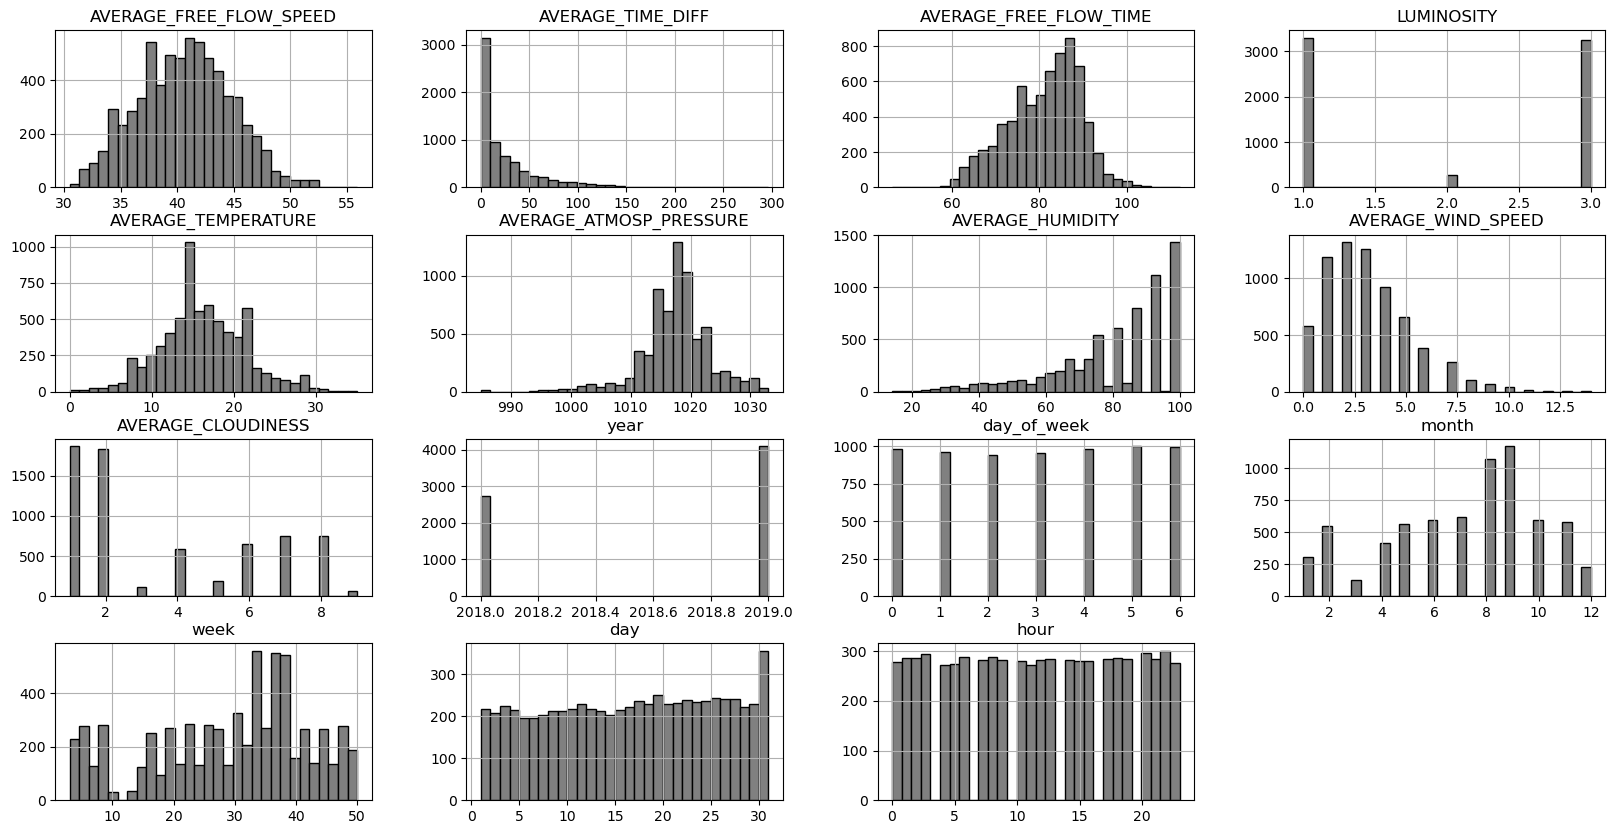

In [97]:
#Plot de histogramas
X_train.hist(bins=30, figsize=(20,10), color='grey', edgecolor='black')
plt.show() 

In [98]:
# Decision Tree Classifier
# Filter out rows where y_train is NaN
id = y_train.notna()
dt = DecisionTreeClassifier(random_state=2025)
dt.fit(X_train[id], y_train[id])
y_test = dt.predict(X_test)

In [99]:
# Desmapeamento dos valores preditos para as categorias originais
inverse_map = {0: 'None', 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very_High'}
y_test = pd.Series(y_test).map(inverse_map)

In [100]:
# Criar CSV de submissão
submission = pd.DataFrame({'RowId': range(1, len(X_test)+1), 'Speed_Diff': y_test})
submission.to_csv('submission.csv', index=False)